# Algoritmos Genéticos: Codificación y Precisión
Este notebook explora cómo se representa un valor real mediante codificación binaria y cómo afecta el número de bits a la precisión.

## Gráfico de conversión: de entero (0–255) a real (-1, 1)

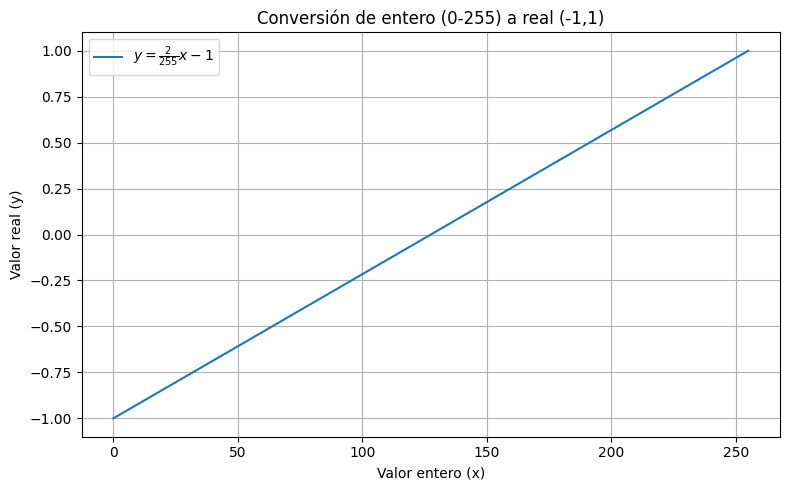

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.arange(0, 256)
y_values = (2 / 255) * x_values - 1

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label=r'$y = \frac{2}{255}x - 1$')
plt.title("Conversión de entero (0-255) a real (-1,1)")
plt.xlabel("Valor entero (x)")
plt.ylabel("Valor real (y)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Distribución de puntos codificados en [-1, 1]

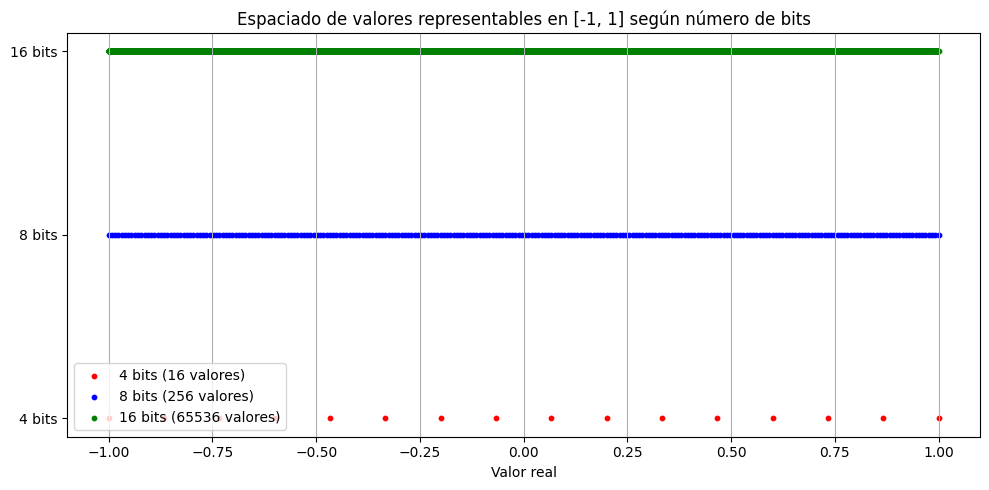

In [ ]:
bits_set = [4, 8, 16]
colors = ['red', 'blue', 'green']

plt.figure(figsize=(10, 5))

for bits, color in zip(bits_set, colors):
    num_values = 2 ** bits
    values = np.linspace(-1, 1, num_values)
    y = np.zeros_like(values) + bits_set.index(bits)
    plt.scatter(values, y, s=10, label=f'{bits} bits ({num_values} valores)', color=color)

plt.yticks(range(len(bits_set)), [f'{b} bits' for b in bits_set])
plt.title("Espaciado de valores representables en [-1, 1] según número de bits")
plt.xlabel("Valor real")
plt.grid(True, axis='x')
plt.legend()
plt.tight_layout()
plt.show()

## Comparación de precisión según número de bits

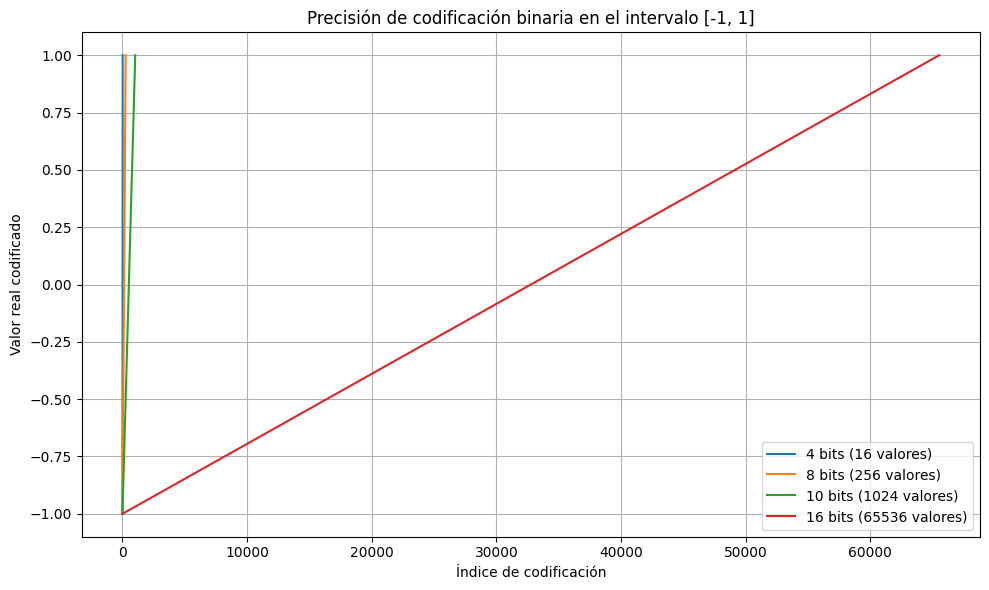

In [ ]:
def generate_real_values(n_bits):
    max_int = 2 ** n_bits - 1
    x = np.arange(0, max_int + 1)
    y = -1 + (x / max_int) * 2
    return x, y

bits_list = [4, 8, 10, 16]
plt.figure(figsize=(10, 6))

for bits in bits_list:
    x_vals, y_vals = generate_real_values(bits)
    plt.plot(y_vals, label=f"{bits} bits ({len(y_vals)} valores)")

plt.title("Precisión de codificación binaria en el intervalo [-1, 1]")
plt.xlabel("Índice de codificación")
plt.ylabel("Valor real codificado")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## codificación binaria con función f(x) = 1 - x²

In [ ]:
# Funciones auxiliares
def binary_to_real(binary_str, min_val=-1, max_val=1):
    decimal = int(binary_str, 2)
    real_val = min_val + (decimal / 255) * (max_val - min_val)
    return real_val

def real_to_binary(x, min_val=-1, max_val=1):
    scaled = int(((x - min_val) / (max_val - min_val)) * 255)
    return format(scaled, '08b')

def fitness_1(x):
    return 1 - x**2

## Evaluación de cadenas binarias con función f(x) = 1 - x²

In [ ]:
import pandas as pd

sample_binaries = ["01000001", "00101001", "10010001", "10010100"]
decoded = [binary_to_real(b) for b in sample_binaries]
fitness_values = [fitness_1(x) for x in decoded]

df_example1 = pd.DataFrame({
    "Valor binario": sample_binaries,
    "Valor real": decoded,
    "Aptitud f(x)=1-x^2": fitness_values
})
df_example1

,Valor binario,Valor real,Aptitud f(x)=1-x^2
0,01000001,-0.490196,0.759708
1,00101001,-0.678431,0.539731
2,10010001,0.137255,0.981161
3,10010100,0.160784,0.974148
